In [19]:
%matplotlib inline
import warnings; warnings.simplefilter('ignore')  # hide warnings 

import sys
sys.path.append("../")

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import particles.mcmc as mcmc
import particles.state_space_models as ssm
import particles.distributions as dists
from particles.core import SMC
from particles import smc_samplers as ssp
import seaborn
from tqdm import tqdm
import pickle
import os

path = r'C:\Users\dobau\Desktop\3A ENSAE\S1\Hidden Markov Chain and MCMC\Project\res'
load_path = r'C:\Users\dobau\Desktop\3A ENSAE\S1\Kangaroos\Data'

from Utils import *

We now use the three steps Adaptative method proposed by Knape & De Valpine (2012). We focus our experiments on the three models detailed in the paper: Random Walk (M3), Exponential growth (M2) and Logistic Diffusion with Euler Discretization (M1).

In [20]:
n_particles = 4000
n_iter = 30000
m1, m2, update_interv = 4000, 20000, 1000

## Random Walk model

In [24]:
prior_RW = {'tau': dists.Uniform(a=0.,b=1.),'sigma': dists.Uniform(a=0.,b=10.)}
p_RW = dists.StructDist(prior_RW)
load_model = True

if load_model:
    new_pmmh_RW = pickle.load(open(os.path.join(load_path,"RW_model_Adapt.pkl"), "rb" ))
else:
    new_pmmh_RW= AdaptivePMMH(ssm_cls=RandomWalk2D, prior=p_RW, data=y, Nx=n_particles, niter=n_iter, adaptive=True,
                          m1=m1, m2=m2, update_interv=update_interv, w01=0.4, w02=0.5, w1=0.8, k0=5., k1=5.)
    new_pmmh_RW.run()
    #pickle.dump(new_pmmh_RW, open( os.path.join(path,"RW_model_Adapt.pkl"), "wb" ) )

mean square jump distance: 412.0032710950125
posterior loglikelihood: [-538.84251422 -538.84251422 -538.84251422 -538.84251422 -540.04985404]
Acceptance rate: 0.30808616172323444
Last terms of theta chain: [(0.52762782, 0.06192152) (0.52762782, 0.06192152)
 (0.45243219, 0.08691041)]


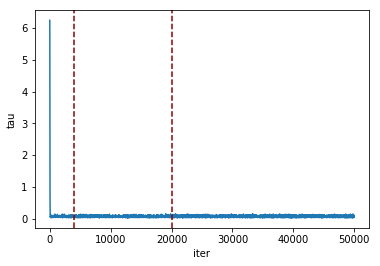

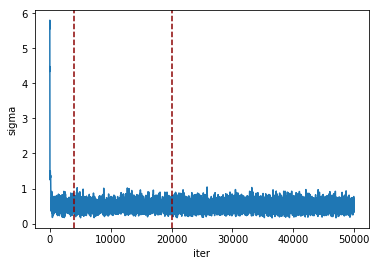

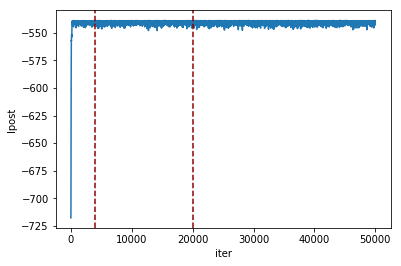

In [25]:
print_metrics(new_pmmh_RW)
plot_theta(prior_RW,new_pmmh_RW, burnin=True, m=[4000,20000])

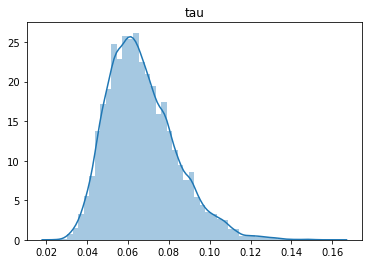

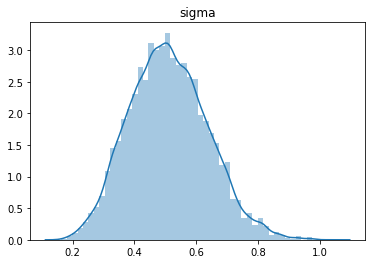

In [26]:
distplot(prior_RW, new_pmmh_RW, 20000)

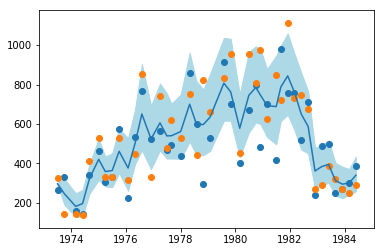

In [28]:
simulRW_new = get_trajectories(N=100, start=20000, model='RW', pmmh=new_pmmh_RW, n_particles=10000)
plot_posterior_trajectories(simulRW_new)

In [29]:
new_pmmh_RW.evidence

-543.655466565785

-540.1215347351587


{'whiskers': [<matplotlib.lines.Line2D at 0x299ba6224e0>,
 'caps': [<matplotlib.lines.Line2D at 0x299ba622da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x299ba622390>],
 'medians': [<matplotlib.lines.Line2D at 0x299ba641630>],
 'fliers': [<matplotlib.lines.Line2D at 0x299ba641a58>],
 'means': []}

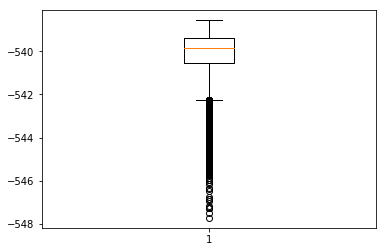

In [30]:
print(new_pmmh_RW.chain.lpost[20000:].mean())
plt.boxplot(new_pmmh_RW.chain.lpost[20000:])

## Exponential Growth (M2)

In [37]:
prior_EG = {'tau': dists.Uniform(a=0.,b=1.),
             'sigma': dists.Uniform(a=0.,b=10.), 'r':dists.Uniform(a=-10., b=10.)}

load_model = True

if load_model:
    new_pmmh_EG = pickle.load(open( os.path.join(load_path,"EG_model_Adapt.pkl"), "rb" ))
else:
    p_EG = dists.StructDist(prior_EG)
    new_pmmh_EG= AdaptivePMMH(ssm_cls=LDPDrift, prior=p_EG, data=y, Nx=n_particles, niter=n_iter, adaptive=True,
                          m1=m1, m2=m2, update_interv=update_interv, w01=0.4, w02=0.5, w1=0.8, k0=5., k1=5.)
    new_pmmh_EG.run()
    #pickle.dump(new_pmmh_EG, open( os.path.join(path,"EG_model_Adapt.pkl"), "wb" ) )

mean square jump distance: 828.6139035069779
posterior loglikelihood: [-542.82164765 -542.82164765 -542.82164765 -542.82164765 -542.82164765]
Acceptance rate: 0.14452289045780917
Last terms of theta chain: [(-0.13747778, 0.56979506, 0.06266357)
 (-0.13747778, 0.56979506, 0.06266357)
 (-0.13747778, 0.56979506, 0.06266357)]


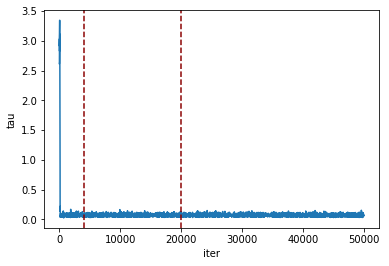

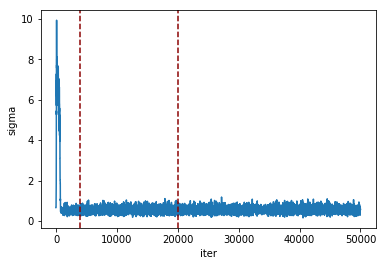

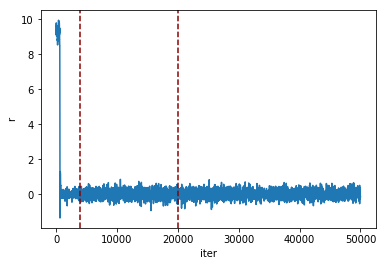

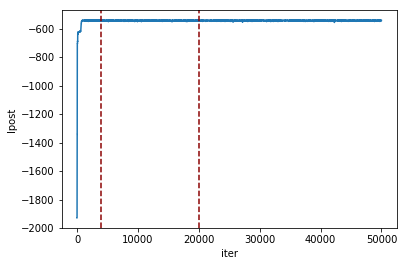

In [38]:
print_metrics(new_pmmh_EG)
plot_theta(prior_EG,new_pmmh_EG, burnin=True, m=[4000,20000])

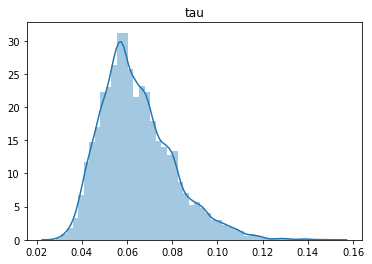

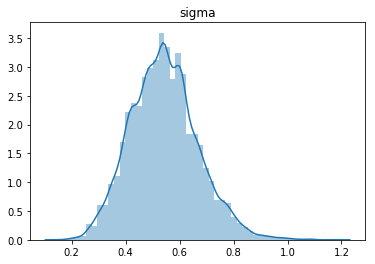

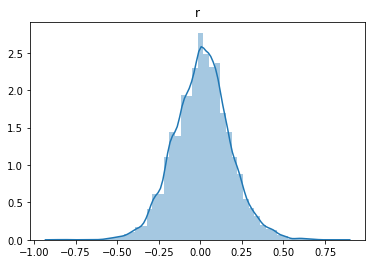

In [40]:
distplot(prior_EG, new_pmmh_EG, 20000)

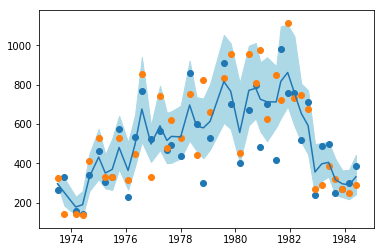

In [41]:
simulEG_new = get_trajectories(N=100, start=20000, model='LDrift', pmmh=new_pmmh_EG, n_particles=10000)
plot_posterior_trajectories(simulEG_new)

In [42]:
new_pmmh_EG.evidence

-547.608362687764

-543.5907384370545


{'whiskers': [<matplotlib.lines.Line2D at 0x299baa22e10>,
 'caps': [<matplotlib.lines.Line2D at 0x299baa22588>,
 'boxes': [<matplotlib.lines.Line2D at 0x299baa22ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x299bd1944e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x299bd194080>],
 'means': []}

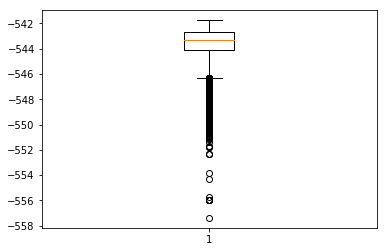

In [43]:
print(new_pmmh_EG.chain.lpost[20000:].mean())
plt.boxplot(new_pmmh_EG.chain.lpost[20000:])

## LDP without Euler Discretization

In [44]:
prior_LD = {'tau': dists.Uniform(a=0.,b=1.), 'b': dists.Uniform(a=0., b=1e-2),
             'sigma': dists.Uniform(a=0.,b=10.), 'r':dists.Uniform(a=-10., b=10.)}
load_model = True

if load_model:
    pmmh_LD = pickle.load(open( os.path.join(path,"LD_model_Adapt_no_discret.pkl"), "rb" ))
else:
    p_LD = dists.StructDist(prior_LD)
    pmmh_LD= AdaptivePMMH(ssm_cls=LogisticDiffusion2D, prior=p_LD, data=y, Nx=n_particles, niter=n_iter, adaptive=True,
                               m1=m1, m2=m2, update_interv=update_interv, w01=0.4, w02=0.5, w1=0.8, k0=5., k1=5.)
    pmmh_LD.run()
    #pickle.dump(pmmh_LD, open( os.path.join(path,"LD_model_Adapt_no_discret.pkl"), "wb" ) )

mean square jump distance: 212.34435755498407
posterior loglikelihood: [-537.33668534 -537.33668534 -537.33668534 -537.33668534 -537.33668534]
Acceptance rate: 0.04546818227274242
Last terms of theta chain: [(6.97933014e-05, 0.30887571, 0.60703385, 0.07582067)
 (6.97933014e-05, 0.30887571, 0.60703385, 0.07582067)
 (6.97933014e-05, 0.30887571, 0.60703385, 0.07582067)]


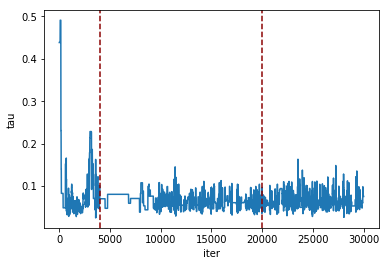

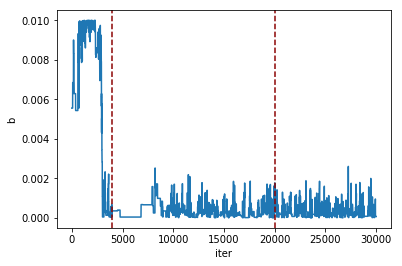

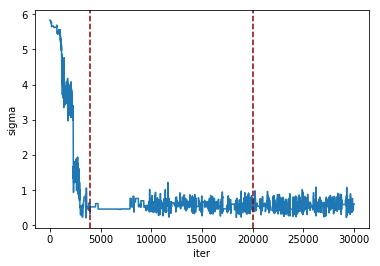

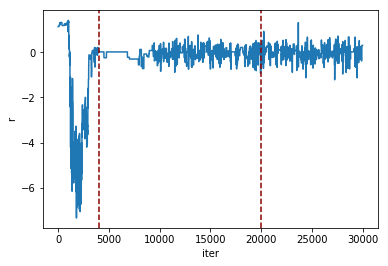

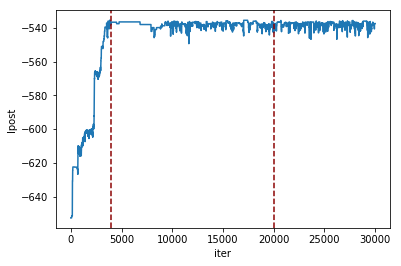

In [8]:
print_metrics(pmmh_LD)
plot_theta(prior_LD,pmmh_LD, burnin=True, m=[4000,20000])

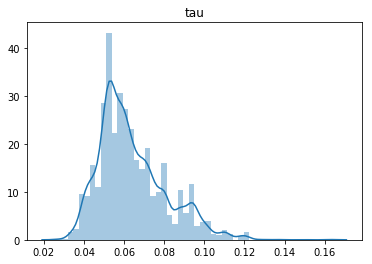

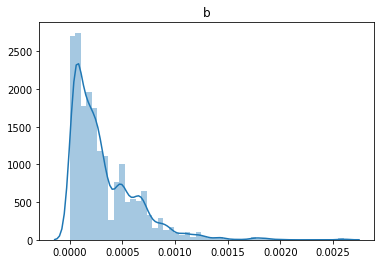

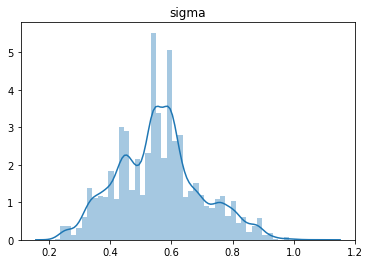

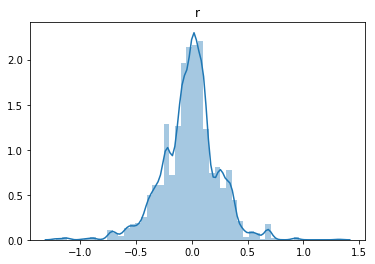

In [9]:
distplot(prior_LD,pmmh_LD, 20000)

In [6]:
simulLD = get_trajectories(N=100, start=2500, model='LD', pmmh=pmmh_LD, n_particles=10000)

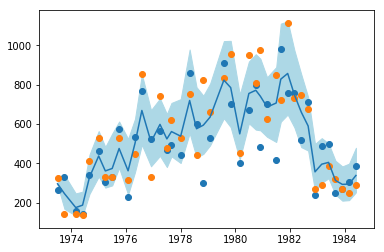

In [7]:
plot_posterior_trajectories(simulLD)

-537.8213964637217


{'whiskers': [<matplotlib.lines.Line2D at 0x299bd2aedd8>,
 'caps': [<matplotlib.lines.Line2D at 0x299bd2aea90>,
 'boxes': [<matplotlib.lines.Line2D at 0x299bd2aefd0>],
 'medians': [<matplotlib.lines.Line2D at 0x299bcfce7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x299bcfcebe0>],
 'means': []}

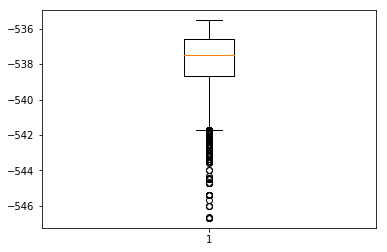

In [45]:
print(pmmh_LD.chain.lpost[20000:].mean())
plt.boxplot(pmmh_LD.chain.lpost[20000:])

## Logistic Diffusion Process with Euler discretization

In [21]:
prior_LDP = {'tau': dists.Uniform(a=0.,b=1.), 'b': dists.Uniform(a=0., b=1e-2),
             'sigma': dists.Uniform(a=0.,b=10.), 'r':dists.Uniform(a=-10., b=10.)}

load_model = True

if load_model:
    new_pmmh_LDP = pickle.load(open( os.path.join(path,"LDP_model_Adapt.pkl"), "rb" ))
else:
    p_LDP = dists.StructDist(prior_LDP)
    new_pmmh_LDP= AdaptivePMMH(ssm_cls=LDEuler, prior=p_LDP, data=y, Nx=n_particles, niter=n_iter, adaptive=True,
                          m1=m1, m2=m2, update_interv=update_interv, w01=0.4, w02=0.5, w1=0.8, k0=25., k1=5.)
    new_pmmh_LDP.run()
    pickle.dump(new_pmmh_LDP, open( os.path.join(path,"LDP_model_Adapt.pkl"), "wb" ) )

mean square jump distance: 0.09935974769684343
posterior loglikelihood: [-545.13132035 -545.13132035 -545.13132035 -545.13132035 -545.13132035]
Acceptance rate: 0.008401680336067214
Last terms of theta chain: [(0.00100965, 0.68198738, 0.16748859, 0.18867634)
 (0.00100965, 0.68198738, 0.16748859, 0.18867634)
 (0.00100965, 0.68198738, 0.16748859, 0.18867634)]


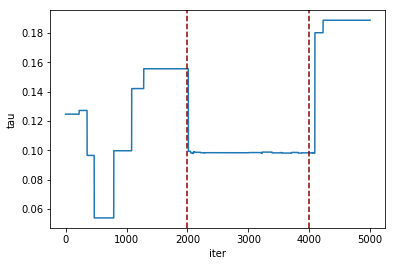

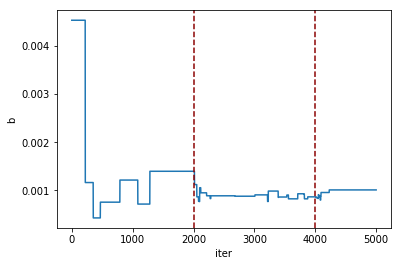

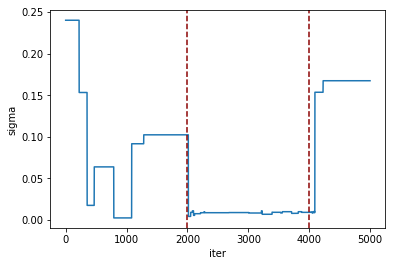

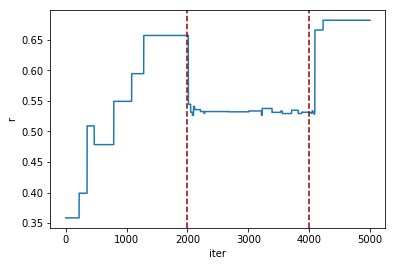

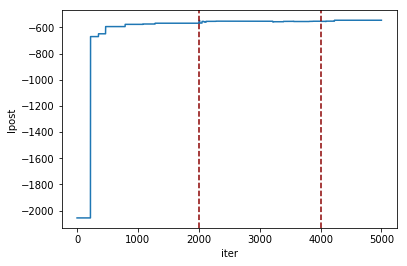

In [22]:
print_metrics(new_pmmh_LDP)
plot_theta(prior_LDP,new_pmmh_LDP, burnin=True, m=[2000,4000])

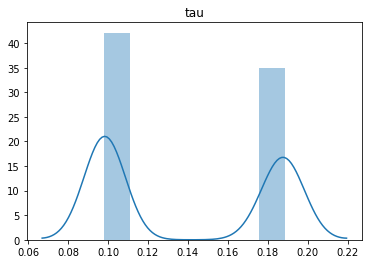

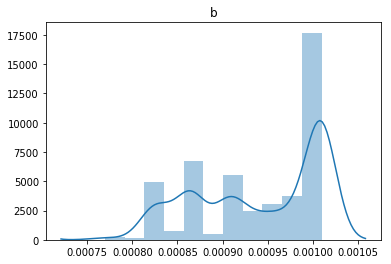

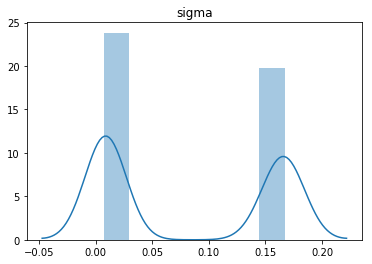

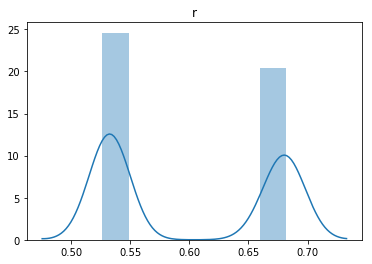

In [12]:
distplot(prior_LDP, new_pmmh_LDP, 3000)

-546.8612527354169


{'whiskers': [<matplotlib.lines.Line2D at 0x278a224eb38>,
 'caps': [<matplotlib.lines.Line2D at 0x278a2250438>,
 'boxes': [<matplotlib.lines.Line2D at 0x278a224e9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x278a2250c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x278a226d0f0>],
 'means': []}

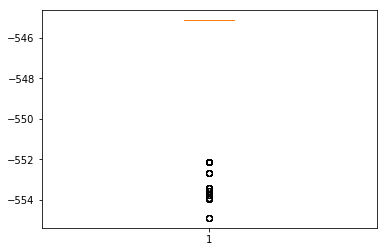

In [24]:
print(new_pmmh_LDP.chain.lpost[4000:].mean())
plt.boxplot(new_pmmh_LDP.chain.lpost[4000:])